In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
import os
import seaborn as sns
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
# ignore warnings
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sarang.sawant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sarang.sawant/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [92]:
import os
PROJECT_ROOT = os.getenv("PROJECT_ROOT", '/Users/sarang.sawant/Documents/GitHub/spam-filtering/')
df = pd.read_csv( os.path.join(PROJECT_ROOT, 'resources/spam.csv'), encoding='latin-1')
                 
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [93]:
# Check Data Shape
df.shape

(5572, 2)

In [94]:
# Check Null Values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [95]:
# Find Duplicate
df.duplicated().any()

np.True_

In [96]:
# drop Duplicates
df.drop_duplicates(inplace=True)

In [97]:
df.duplicated().any()

np.False_

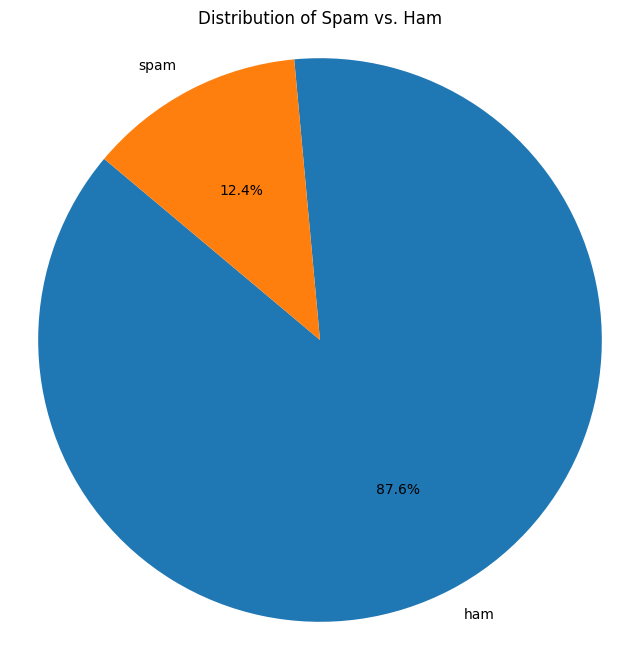

In [98]:
# Calculate the count of each label
category_counts = df['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam vs. Ham')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

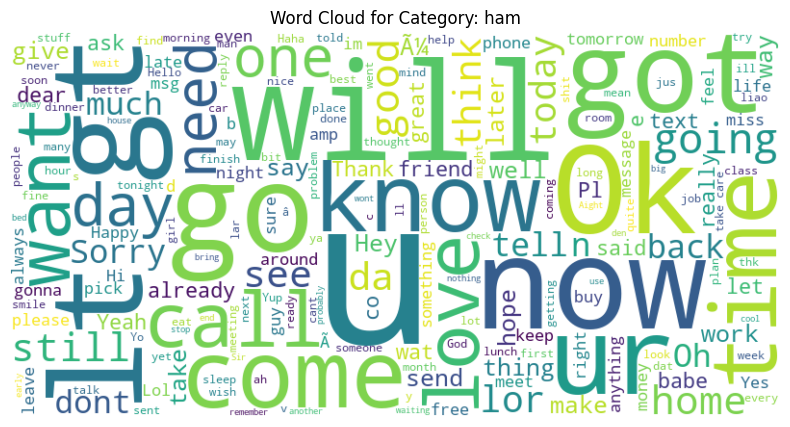

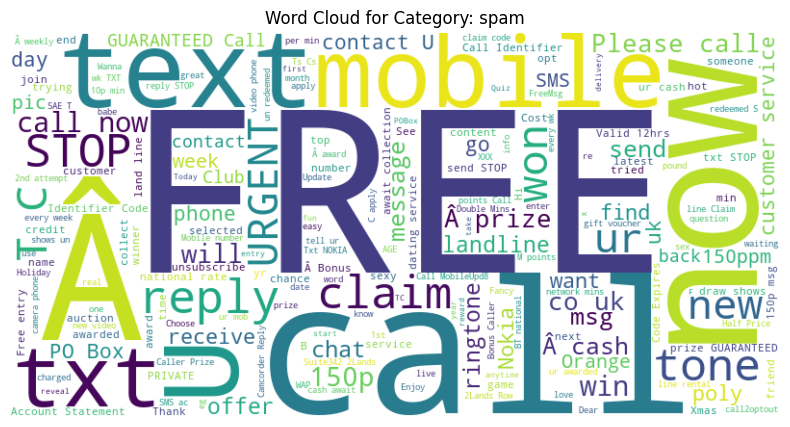

In [99]:
# Iterate through unique categories
for category in df['Category'].unique():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Category'] == category]

    # Concatenate all text data for the current category
    text = ' '.join(filtered_df['Message'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

In [100]:
# Encode Category column
le = LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [101]:
# Convert 'Text' column to lowercase
df['Message'] = df['Message'].str.lower()
df.head()
# Remove extra white spaces from the 'Text' column
df['Message'] = df['Message'].str.strip()
df.head()
# Function to remove HTML tags from text
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Remove HTML tags from 'Text' column
df['Message'] = df['Message'].apply(remove_html_tags)
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [102]:
# Define a function to remove URLs using regular expressions
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

# Apply the function to the 'Text' column
df['Message'] = df['Message'].apply(remove_urls)
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [103]:
string.punctuation

# Define the punctuation characters to remove
punctuation = string.punctuation
# Function to remove punctuation from text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

# Apply remove_punctuation function to 'Text' column
df['Message'] = df['Message'].apply(remove_punctuation)
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [104]:
def remove_special_characters(text):
    # Define the pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'  # Matches any character that is not alphanumeric or whitespace

    # Replace special characters with an empty string
    clean_text = re.sub(pattern, '', text)

    return clean_text

# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(remove_special_characters)

In [105]:
# Function to remove numeric values from text
def remove_numeric(text):
    return re.sub(r'\d+', '', text)

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_numeric)
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [106]:
# Define a function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_non_alphanumeric)

In [107]:
# Define a dictionary of chat word mappings
chat_words = {
    "y": "you",
    "r": "are",
    "b4": "before",
    "gr8": "great",
    "l8r": "later",
    "pls": "please",
    "thx": "thanks",
    "afaiK": "As Far As I Know",
    "afk": "Away From Keyboard",
    "asap": "As Soon As Possible",
    "atk": "At The Keyboard",
    "atm": "At The Moment",
    "a3": "Anytime, Anywhere, Anyplace",
    "bak": "Back At Keyboard",
    "bbl": "Be Back Later",
    "bbs": "Be Back Soon",
    "bfn": "Bye For Now",
    "b4n": "Bye For Now",
    "brb": "Be Right Back",
    "brt": "Be Right There",
    "btw": "By The Way",
    "b4": "Before",
    "b4n": "Bye For Now",
    "cu": "See You",
    "cul8r": "See You Later",
    "cya": "See You",
    "faq": "Frequently Asked Questions",
    "fc": "Fingers Crossed",
    "fwiw": "For What It's Worth",
    "fyi": "For Your Information",
    "gal": "Get A Life",
    "gg": "Good Game",
    "gn": "Good Night",
    "gmta": "Great Minds Think Alike",
    "gr8": "Great!",
    "g9": "Genius",
    "ic": "I See",
    "icq": "I Seek you (also a chat program)",
    "ilu": "ILU: I Love You",
    "imho": "In My Honest/Humble Opinion",
    "imo": "In My Opinion",
    "iow": "In Other Words",
    "irl": "In Real Life",
    "kiss": "Keep It Simple, Stupid",
    "ldr": "Long Distance Relationship",
    "lmao": "Laugh My A.. Off",
    "lol": "Laughing Out Loud",
    "ltns": "Long Time No See",
    "l8r": "Later",
    "mte": "My Thoughts Exactly",
    "m8": "Mate",
    "nrn": "No Reply Necessary",
    "oic": "Oh I See",
    "pita": "Pain In The A..",
    "prt": "Party",
    "prw": "Parents Are Watching",
    "qpsa?": "Que Pasa?",
    "rofl": "Rolling On The Floor Laughing",
    "roflol": "Rolling On The Floor Laughing Out Loud",
    "rotflmao": "Rolling On The Floor Laughing My A.. Off",
    "sk8": "Skate",
    "stats": "Your sex and age",
    "asl": "Age, Sex, Location",
    "thx": "Thank You",
    "ttfn": "Ta-Ta For Now!",
    "ttyl": "Talk To You Later",
    "u": "You",
    "u2": "You Too",
    "u4e": "Yours For Ever",
    "wb": "Welcome Back",
    "wtf": "What The F...",
    "wtg": "Way To Go!",
    "wuf": "Where Are You From?",
    "w8": "Wait...",
    "7k": "Sick:-D Laugher",
    "tfw": "That feeling when",
    "mfw": "My face when",
    "mrw": "My reaction when",
    "ifyp": "I feel your pain",
    "tntl": "Trying not to laugh",
    "jk": "Just kidding",
    "idc": "I don't care",
    "ily": "I love you",
    "imu": "I miss you",
    "adih": "Another day in hell",
    "zzz": "Sleeping, bored, tired",
    "wywh": "Wish you were here",
    "time": "Tears in my eyes",
    "bae": "Before anyone else",
    "fimH": "Forever in my heart",
    "bsaaW": "Big smile and a wink",
    "bwl": "Bursting with laughter",
    "bff": "Best friends forever",
    "csl": "Can't stop laughing"
    }

In [108]:
# Function to replace chat words with their full forms
def replace_chat_words(text):
    words = text.split()
    for i, word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)

# Apply replace_chat_words function to 'Text' column
df['Message'] = df['Message'].apply(replace_chat_words)

In [109]:
# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Message'] = df['Message'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sarang.sawant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [110]:
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply remove_emojis function to 'Text' column
df['Message'] = df['Message'].apply(remove_emojis)

In [111]:
# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Message_stemmed'] = df['Message'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))

In [ ]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)

# Fitting TfidfVectorizer on X
x = vectorizer.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']


# Train Test Split
X_train, X_test , y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=3000)  # Use the same max_features as TfidfVectorizer
tokenizer.fit_on_texts(df['Message_stemmed'])
tokenizer.word_index
# Use the original text data for tokenization
x_seq = tokenizer.texts_to_sequences(df['Message_stemmed'])
y_seq = tokenizer.texts_to_sequences(df['Category'].astype(str))

# Perform train-test split on the tokenized sequences
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(x_seq, y, test_size=0.2, random_state=42)
y_train_seq, y_test_seq

# Pad sequences to ensure uniform input size
max_sequence_length = 500  # Define a maximum sequence length
X_train_seq_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

# # Convert y_train_seq and y_test_seq to numpy arrays
# y_train_seq = np.array(y_train_seq)
# y_test_seq = np.array(y_test_seq)

# y trains and test padded 
y_train_seq_padded = pad_sequences(y_train_seq, maxlen=max_sequence_length, padding='post')
y_test_seq_padded = pad_sequences(y_test_seq, maxlen=max_sequence_length, padding='post')

ValueError: `sequences` must be a list of iterables. Found non-iterable: 0

In [132]:
df['Message_stemmed']
X_test
import seaborn as sns

In [136]:
# Logistic Regression with tuned parameters
lr_model = LogisticRegression(C=0.1, solver='liblinear', max_iter=500)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Multinomial Naive Bayes with tuned parameters
mnb_model = MultinomialNB(alpha=0.1)
mnb_model.fit(X_train, y_train)
mnb_pred = mnb_model.predict(X_test)

# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_test)

# Support Vector Machines (SVM) with tuned parameters
svm_model = SVC(C=10.0, kernel='rbf', gamma='auto')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Decision Trees with tuned parameters
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Random Forests with tuned parameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=10)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Gradient Boosting Classifier with tuned parameters
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=5)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# XGBoost Classifier with tuned parameters
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Pad sequences to ensure uniform input size
max_sequence_length = 500  # Increased to handle larger messages  # Define a maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

# Define the LSTM-CNN model
lstm_cnn_model = Sequential([
  Embedding(input_dim=3000, output_dim=100, input_length=max_sequence_length),  # GloVe embedding size is 100
  Conv1D(filters=128, kernel_size=5, activation='relu'),
  MaxPooling1D(pool_size=2),
  LSTM(units=128, return_sequences=True),
  Dropout(0.5),
  Flatten(),
  Dense(units=128, activation='relu'),
  Dropout(0.5),
  Dense(units=1, activation='sigmoid')  # Binary classification (spam or ham)
])

# Compile the model
lstm_cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_cnn_model.fit(X_train_padded, y_train_seq_padded, epochs=5, batch_size=64, validation_split=0.2)

# Predict on the test set
lstm_cnn_pred = (lstm_cnn_model.predict(X_test_padded) > 0.5).astype(int)


Epoch 1/5


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 500), output.shape=(None, 1)

NameError: name 'sns' is not defined

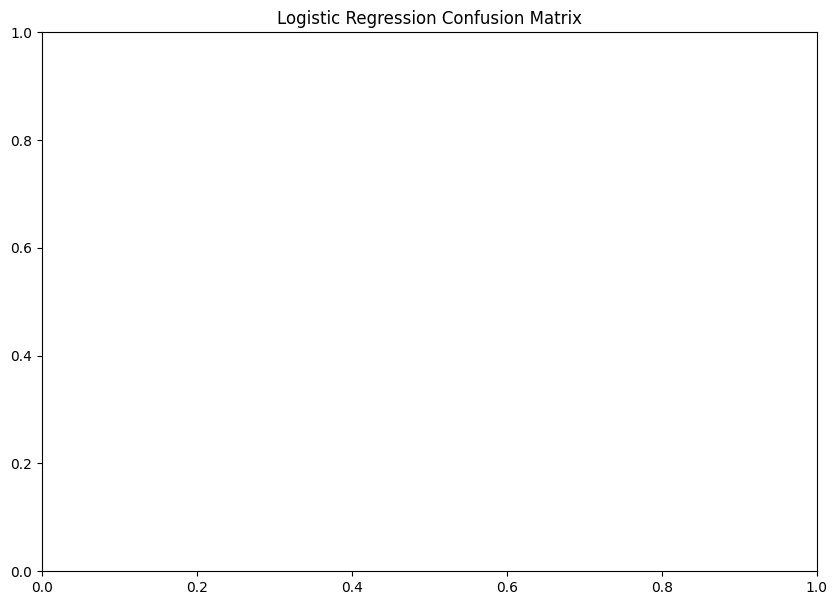

In [117]:
# Calculate accuracy, precision and recall for each model
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_conf_matrix = confusion_matrix(y_test, lr_pred)

mnb_accuracy = accuracy_score(y_test, mnb_pred)
mnb_precision = precision_score(y_test, mnb_pred, average='weighted')
mnb_recall = recall_score(y_test, mnb_pred, average='weighted')
mnb_conf_matrix = confusion_matrix(y_test, mnb_pred)

gnb_accuracy = accuracy_score(y_test, gnb_pred)
gnb_precision = precision_score(y_test, gnb_pred, average='weighted')
gnb_recall = recall_score(y_test, gnb_pred, average='weighted')
gnb_conf_matrix = confusion_matrix(y_test, gnb_pred)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_conf_matrix = confusion_matrix(y_test, svm_pred)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_conf_matrix = confusion_matrix(y_test, dt_pred)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
gb_conf_matrix = confusion_matrix(y_test, gb_pred)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)

lstm_cnn_accuracy = accuracy_score(y_test, lstm_cnn_pred)
lstm_cnn_precision = precision_score(y_test, lstm_cnn_pred, average='weighted')
lstm_cnn_recall = recall_score(y_test, lstm_cnn_pred, average='weighted')
lstm_cnn_conf_matrix = confusion_matrix(y_test, lstm_cnn_pred)

#draw confusion matrix
def draw_confusion_matrix(
  accuracy, precision, recall, confusion_matrix, model_name):
  plt.figure(figsize=(10, 7))
  plt.title(f'{model_name} Confusion Matrix')
  sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.show()
# Draw confusion matrix for each model
draw_confusion_matrix(lr_accuracy, lr_precision, lr_recall, lr_conf_matrix, 'Logistic Regression')
draw_confusion_matrix(mnb_accuracy, mnb_precision, mnb_recall, mnb_conf_matrix, 'Multinomial Naive Bayes')
draw_confusion_matrix(gnb_accuracy, gnb_precision, gnb_recall, gnb_conf_matrix, 'Gaussian Naive Bayes')
draw_confusion_matrix(svm_accuracy, svm_precision, svm_recall, svm_conf_matrix, 'Support Vector Machines')
draw_confusion_matrix(dt_accuracy, dt_precision, dt_recall, dt_conf_matrix, 'Decision Trees')
draw_confusion_matrix(rf_accuracy, rf_precision, rf_recall, rf_conf_matrix, 'Random Forests')
draw_confusion_matrix(gb_accuracy, gb_precision, gb_recall, gb_conf_matrix, 'Gradient Boosting Classifier')
draw_confusion_matrix(xgb_accuracy, xgb_precision, xgb_recall, xgb_conf_matrix, 'XGBoost Classifier')
draw_confusion_matrix(lstm_cnn_accuracy, lstm_cnn_precision, lstm_cnn_recall, lstm_cnn_conf_matrix, 'LSTM-CNN')

In [ ]:
# Print precision, recall, and accuracy for each model
print("Logistic Regression:")
print(f"The accuracy score of Logistic Regression is {lr_accuracy}, The Precision Score is {lr_precision},The Recall Score is {lr_recall}")
print(f"The Confusion matrix is \n{lr_conf_matrix}")
print("\n")

print("Multinomial Naive Bayes:")
print(f"The accuracy score of MultinomialNB is {mnb_accuracy}, The Precision Score is {mnb_precision},The Recall Score is {mnb_recall}")
print(f"The Confusion matrix is \n{mnb_conf_matrix}")
print("\n")

print("Gaussian Naive Bayes:")
print(f"The accuracy score of GaussianNB is {gnb_accuracy}, The Precision Score is {gnb_precision},The Recall Score is {gnb_recall}")
print(f"The Confusion matrix is \n{gnb_conf_matrix}")
print("\n")

print("SVM:")
print(f"The accuracy score of SVC is {svm_accuracy}, The Precision Score is {svm_precision},The Recall Score is {svm_recall}")
print(f"The Confusion matrix is \n{svm_conf_matrix}")
print("\n")

print("Decision Trees:")
print(f"The accuracy score of Decision Tree classifier is {dt_accuracy}, The Precision Score is {dt_precision},The Recall Score is {dt_recall}")
print(f"The Confusion matrix is \n{dt_conf_matrix}")
print("\n")

print("Random Forests:")
print(f"The accuracy score of Random Forest classifier is {rf_accuracy}, The Precision Score is {rf_precision},The Recall Score is {rf_recall}")
print(f"The Confusion matrix is \n{rf_conf_matrix}")
print("\n")

print("Gradient Boosting Classifier:")
print(f"The accuracy score of Gradient Boosting Classifier is {gb_accuracy}, The Precision Score is {gb_precision},The Recall Score is {gb_recall}")
print(f"The Confusion matrix is \n{gb_conf_matrix}")
print("\n")

print("XGBoost Classifier:")
print(f"The accuracy score of XGBoost Classifier is {xgb_accuracy}, The Precision Score is {xgb_precision},The Recall Score is {xgb_recall}")
print(f"The Confusion matrix is \n{xgb_conf_matrix}")
print("\n")

print("LSTM-CNN:")
print(f"The accuracy score of LSTM-CNN is {lstm_cnn_accuracy}, The Precision Score is {lstm_cnn_precision},The Recall Score is {lstm_cnn_recall}")
print(f"The Confusion matrix is \n{lstm_cnn_conf_matrix}")
print("\n")

Logistic Regression:
The accuracy score of Logistic Regression is 0.8701550387596899, The Precision Score is 0.8870474900278467,The Recall Score is 0.8701550387596899
The Confusion matrix is 
[[896   0]
 [134   2]]


Multinomial Naive Bayes:
The accuracy score of MultinomialNB is 0.9767441860465116, The Precision Score is 0.9767441860465116,The Recall Score is 0.9767441860465116
The Confusion matrix is 
[[884  12]
 [ 12 124]]


Gaussian Naive Bayes:
The accuracy score of GaussianNB is 0.8527131782945736, The Precision Score is 0.9034061545689454,The Recall Score is 0.8527131782945736
The Confusion matrix is 
[[768 128]
 [ 24 112]]


SVM:
The accuracy score of SVC is 0.8682170542635659, The Precision Score is 0.7538008533141037,The Recall Score is 0.8682170542635659
The Confusion matrix is 
[[896   0]
 [136   0]]


Decision Trees:
The accuracy score of Decision Tree classifier is 0.9457364341085271, The Precision Score is 0.9436288117122118,The Recall Score is 0.9457364341085271
The Con

In [ ]:
# Create a dictionary with evaluation results
evaluation_data = {
    'Model': ['Logistic Regression', 'MultinomialNB', 'GaussianNB', 'Decision Tree', 'SVM', 'Random Forest',
              'Gradient Boosting', 'XGBoost', 'LSTM-CNN'],
    'Accuracy': [lr_accuracy, mnb_accuracy, gnb_accuracy, dt_accuracy, svm_accuracy, rf_accuracy,
                 gb_accuracy, xgb_accuracy, lstm_cnn_accuracy],
    'Precision': [lr_precision, mnb_precision, gnb_precision, dt_precision, svm_precision, rf_precision,
                  gb_precision, xgb_precision, lstm_cnn_precision],
    'Recall': [lr_recall, mnb_recall, gnb_recall, dt_recall, svm_recall, rf_recall,
               gb_recall, xgb_recall, lstm_cnn_recall]
   }

# Create a DataFrame
evaluation_df = pd.DataFrame(evaluation_data)

# Sort the DataFrame based on Accuracy and Precision columns in descending order
evaluation_df = evaluation_df.sort_values(by=['Accuracy', 'Precision', 'Recall'], ascending=False)

# Display the sorted DataFrame
print(evaluation_df)


                 Model  Accuracy  Precision    Recall
1        MultinomialNB  0.976744   0.976744  0.976744
7              XGBoost  0.959302   0.959048  0.959302
6    Gradient Boosting  0.950581   0.949737  0.950581
3        Decision Tree  0.945736   0.943629  0.945736
5        Random Forest  0.937984   0.941123  0.937984
0  Logistic Regression  0.870155   0.887047  0.870155
4                  SVM  0.868217   0.753801  0.868217
2           GaussianNB  0.852713   0.903406  0.852713


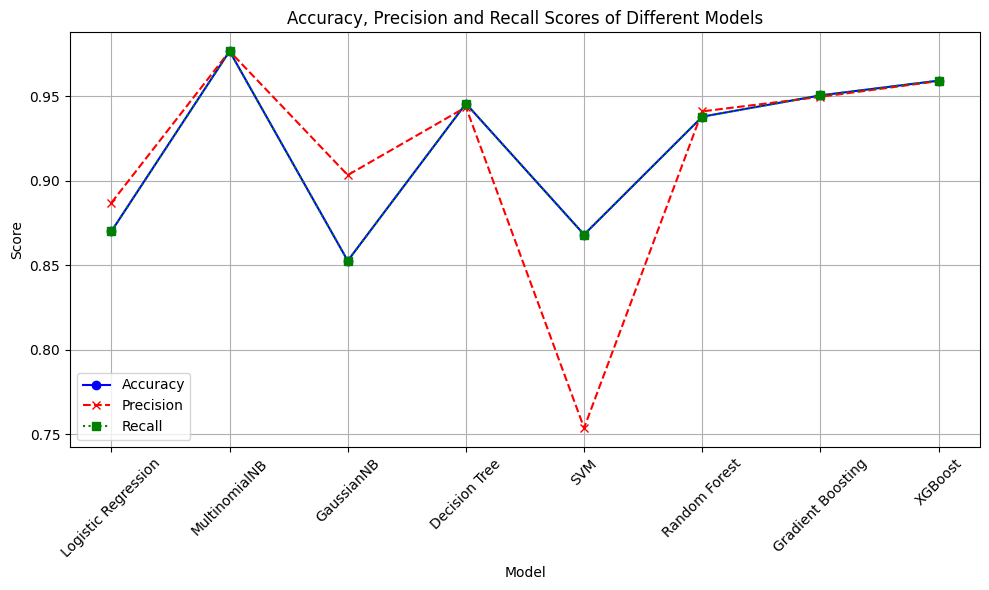

In [ ]:
# Define the models and their corresponding accuracy and precision scores
Models = ['Logistic Regression', 'MultinomialNB', 'GaussianNB', 'Decision Tree', 'SVM', 'Random Forest',
          'Gradient Boosting', 'XGBoost', 'LSTM-CNN']
Accuracy = [lr_accuracy, mnb_accuracy, gnb_accuracy, dt_accuracy, svm_accuracy, rf_accuracy,
            gb_accuracy, xgb_accuracy, lstm_cnn_accuracy]
Precision = [lr_precision, mnb_precision, gnb_precision, dt_precision, svm_precision, rf_precision,
             gb_precision, xgb_precision, lstm_cnn_precision]
Recall = [lr_recall, mnb_recall, gnb_recall, dt_recall, svm_recall, rf_recall,
          gb_recall, xgb_recall, lstm_cnn_recall]

# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy scores
plt.plot(Models, Accuracy, marker='o', linestyle='-', color='b', label='Accuracy')

# Plot precision scores
plt.plot(Models, Precision, marker='x', linestyle='--', color='r', label='Precision')

# Plot Recall scores
plt.plot(Models, Recall, marker='s', linestyle=':', color='g', label='Recall')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Accuracy, Precision and Recall Scores of Different Models')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [80]:
# Example new email message
new_email = "XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL"

# Preprocess the new email
new_email_cleaned = remove_html_tags(new_email)  # Remove HTML tags
new_email_cleaned = remove_urls(new_email_cleaned)  # Remove URLs
new_email_cleaned = remove_punctuation(new_email_cleaned)  # Remove punctuation
new_email_cleaned = remove_special_characters(new_email_cleaned)  # Remove special characters
new_email_cleaned = remove_numeric(new_email_cleaned)  # Remove numbers
new_email_cleaned = remove_non_alphanumeric(new_email_cleaned)  # Remove non-alphanumeric characters
new_email_cleaned = replace_chat_words(new_email_cleaned)  # Replace chat words
new_email_cleaned = remove_stopwords(new_email_cleaned)  # Remove stopwords
new_email_cleaned = remove_emojis(new_email_cleaned)  # Remove emojis
new_email_cleaned = ' '.join([porter_stemmer.stem(word) for word in new_email_cleaned.split()])  # Stemming

# Transform the cleaned email text into a feature vector using the fitted CountVectorizer
new_email_vector = vectorizer.transform([new_email_cleaned]).toarray()

# Choose the model you want to use for prediction (e.g., Logistic Regression)
model_to_use = lr_model  # Logistic Regression model trained earlier

# Make the prediction
prediction = model_to_use.predict(new_email_vector)

# Decode the predicted label (0 or 1) back to 'spam' or 'ham'
predicted_label = le.inverse_transform(prediction)[0]

# Print the result
print(f"The email is classified as: {predicted_label}")

The email is classified as: ham


In [81]:
# Example new email message
new_email = "Even my brother is not like to speak with me. They treat me like aids patent."

# Preprocess the new email
new_email_cleaned = remove_html_tags(new_email)  # Remove HTML tags
new_email_cleaned = remove_urls(new_email_cleaned)  # Remove URLs
new_email_cleaned = remove_punctuation(new_email_cleaned)  # Remove punctuation
new_email_cleaned = remove_special_characters(new_email_cleaned)  # Remove special characters
new_email_cleaned = remove_numeric(new_email_cleaned)  # Remove numbers
new_email_cleaned = remove_non_alphanumeric(new_email_cleaned)  # Remove non-alphanumeric characters
new_email_cleaned = replace_chat_words(new_email_cleaned)  # Replace chat words
new_email_cleaned = remove_stopwords(new_email_cleaned)  # Remove stopwords
new_email_cleaned = remove_emojis(new_email_cleaned)  # Remove emojis
new_email_cleaned = ' '.join([porter_stemmer.stem(word) for word in new_email_cleaned.split()])  # Stemming

# Transform the cleaned email text into a feature vector using the fitted CountVectorizer
new_email_vector = vectorizer.transform([new_email_cleaned]).toarray()

# Choose the model you want to use for prediction (e.g., MultinomialNB)
model_to_use_mnb = mnb_model  # Multinomial model trained earlier

# Make the prediction
prediction = model_to_use_mnb.predict(new_email_vector)

# Decode the predicted label (0 or 1) back to 'spam' or 'ham'
predicted_label = le.inverse_transform(prediction)[0]

# Print the result
print(f"The email is classified as: {predicted_label}")

The email is classified as: ham


In [82]:
# Example new email message
new_email = "07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow"

# Preprocess the new email
new_email_cleaned = remove_html_tags(new_email)  # Remove HTML tags
new_email_cleaned = remove_urls(new_email_cleaned)  # Remove URLs
new_email_cleaned = remove_punctuation(new_email_cleaned)  # Remove punctuation
new_email_cleaned = remove_special_characters(new_email_cleaned)  # Remove special characters
new_email_cleaned = remove_numeric(new_email_cleaned)  # Remove numbers
new_email_cleaned = remove_non_alphanumeric(new_email_cleaned)  # Remove non-alphanumeric characters
new_email_cleaned = replace_chat_words(new_email_cleaned)  # Replace chat words
new_email_cleaned = remove_stopwords(new_email_cleaned)  # Remove stopwords
new_email_cleaned = remove_emojis(new_email_cleaned)  # Remove emojis
new_email_cleaned = ' '.join([porter_stemmer.stem(word) for word in new_email_cleaned.split()])  # Stemming

# Transform the cleaned email text into a feature vector using the fitted CountVectorizer
new_email_vector = vectorizer.transform([new_email_cleaned]).toarray()

# Choose the model you want to use for prediction (e.g., GradientNB)
model_to_use_gnb = gnb_model  # GradientNB model trained earlier

# Make the prediction
prediction = model_to_use_gnb.predict(new_email_vector)

# Decode the predicted label (0 or 1) back to 'spam' or 'ham'
predicted_label = le.inverse_transform(prediction)[0]

# Print the result
print(f"The email is classified as: {predicted_label}")

The email is classified as: spam


In [83]:
# Example new email message
new_email = "Yeah hopefully, if tyler can't do it I could maybe ask around a bit"

# Preprocess the new email
new_email_cleaned = remove_html_tags(new_email)  # Remove HTML tags
new_email_cleaned = remove_urls(new_email_cleaned)  # Remove URLs
new_email_cleaned = remove_punctuation(new_email_cleaned)  # Remove punctuation
new_email_cleaned = remove_special_characters(new_email_cleaned)  # Remove special characters
new_email_cleaned = remove_numeric(new_email_cleaned)  # Remove numbers
new_email_cleaned = remove_non_alphanumeric(new_email_cleaned)  # Remove non-alphanumeric characters
new_email_cleaned = replace_chat_words(new_email_cleaned)  # Replace chat words
new_email_cleaned = remove_stopwords(new_email_cleaned)  # Remove stopwords
new_email_cleaned = remove_emojis(new_email_cleaned)  # Remove emojis
new_email_cleaned = ' '.join([porter_stemmer.stem(word) for word in new_email_cleaned.split()])  # Stemming

# Transform the cleaned email text into a feature vector using the fitted CountVectorizer
new_email_vector = vectorizer.transform([new_email_cleaned]).toarray()

# Choose the model you want to use for prediction (e.g., Decision Tree)
model_to_use_dt = dt_model  # Decision Tree model trained earlier

# Make the prediction
prediction = model_to_use_dt.predict(new_email_vector)

# Decode the predicted label (0 or 1) back to 'spam' or 'ham'
predicted_label = le.inverse_transform(prediction)[0]

# Print the result
print(f"The email is classified as: {predicted_label}")

The email is classified as: ham


In [84]:
# Example new email message
new_email = "Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16"

# Preprocess the new email
new_email_cleaned = remove_html_tags(new_email)  # Remove HTML tags
new_email_cleaned = remove_urls(new_email_cleaned)  # Remove URLs
new_email_cleaned = remove_punctuation(new_email_cleaned)  # Remove punctuation
new_email_cleaned = remove_special_characters(new_email_cleaned)  # Remove special characters
new_email_cleaned = remove_numeric(new_email_cleaned)  # Remove numbers
new_email_cleaned = remove_non_alphanumeric(new_email_cleaned)  # Remove non-alphanumeric characters
new_email_cleaned = replace_chat_words(new_email_cleaned)  # Replace chat words
new_email_cleaned = remove_stopwords(new_email_cleaned)  # Remove stopwords
new_email_cleaned = remove_emojis(new_email_cleaned)  # Remove emojis
new_email_cleaned = ' '.join([porter_stemmer.stem(word) for word in new_email_cleaned.split()])  # Stemming

# Transform the cleaned email text into a feature vector using the fitted CountVectorizer
new_email_vector = vectorizer.transform([new_email_cleaned]).toarray()

# Choose the model you want to use for prediction (e.g., SVM)
model_to_use_svm = svm_model  # SVM model trained earlier

# Make the prediction
prediction = model_to_use_svm.predict(new_email_vector)

# Decode the predicted label (0 or 1) back to 'spam' or 'ham'
predicted_label = le.inverse_transform(prediction)[0]

# Print the result
print(f"The email is classified as: {predicted_label}")

The email is classified as: ham


In [85]:
# Example new email message
new_email = "Too late. I said i have the website. I didn't i have or dont have the slippers"

# Preprocess the new email
new_email_cleaned = remove_html_tags(new_email)  # Remove HTML tags
new_email_cleaned = remove_urls(new_email_cleaned)  # Remove URLs
new_email_cleaned = remove_punctuation(new_email_cleaned)  # Remove punctuation
new_email_cleaned = remove_special_characters(new_email_cleaned)  # Remove special characters
new_email_cleaned = remove_numeric(new_email_cleaned)  # Remove numbers
new_email_cleaned = remove_non_alphanumeric(new_email_cleaned)  # Remove non-alphanumeric characters
new_email_cleaned = replace_chat_words(new_email_cleaned)  # Replace chat words
new_email_cleaned = remove_stopwords(new_email_cleaned)  # Remove stopwords
new_email_cleaned = remove_emojis(new_email_cleaned)  # Remove emojis
new_email_cleaned = ' '.join([porter_stemmer.stem(word) for word in new_email_cleaned.split()])  # Stemming

# Transform the cleaned email text into a feature vector using the fitted CountVectorizer
new_email_vector = vectorizer.transform([new_email_cleaned]).toarray()

# Choose the model you want to use for prediction (e.g., Random Forest)
model_to_use_rf = rf_model  # Random Forest model trained earlier

# Make the prediction
prediction = model_to_use_rf.predict(new_email_vector)

# Decode the predicted label (0 or 1) back to 'spam' or 'ham'
predicted_label = le.inverse_transform(prediction)[0]

# Print the result
print(f"The email is classified as: {predicted_label}")

The email is classified as: ham


In [86]:
# Example new email message
new_email = "PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S. I. M. points. Call 08715203694 Identifier Code: 40533 Expires 31/10/04"

# Preprocess the new email
new_email_cleaned = remove_html_tags(new_email)  # Remove HTML tags
new_email_cleaned = remove_urls(new_email_cleaned)  # Remove URLs
new_email_cleaned = remove_punctuation(new_email_cleaned)  # Remove punctuation
new_email_cleaned = remove_special_characters(new_email_cleaned)  # Remove special characters
new_email_cleaned = remove_numeric(new_email_cleaned)  # Remove numbers
new_email_cleaned = remove_non_alphanumeric(new_email_cleaned)  # Remove non-alphanumeric characters
new_email_cleaned = replace_chat_words(new_email_cleaned)  # Replace chat words
new_email_cleaned = remove_stopwords(new_email_cleaned)  # Remove stopwords
new_email_cleaned = remove_emojis(new_email_cleaned)  # Remove emojis
new_email_cleaned = ' '.join([porter_stemmer.stem(word) for word in new_email_cleaned.split()])  # Stemming

# Transform the cleaned email text into a feature vector using the fitted CountVectorizer
new_email_vector = vectorizer.transform([new_email_cleaned]).toarray()

# Choose the model you want to use for prediction (e.g., Gradient Boost)
model_to_use_gb = gb_model  # Gradient Boost model trained earlier

# Make the prediction
prediction = model_to_use_gb.predict(new_email_vector)

# Decode the predicted label (0 or 1) back to 'spam' or 'ham'
predicted_label = le.inverse_transform(prediction)[0]

# Print the result
print(f"The email is classified as: {predicted_label}")

The email is classified as: spam


In [ ]:
# Example new email message
new_email = "Have you had a good day? Mine was really busy are you up to much tomorrow night?"

# Preprocess the new email
new_email_cleaned = remove_html_tags(new_email)  # Remove HTML tags
new_email_cleaned = remove_urls(new_email_cleaned)  # Remove URLs
new_email_cleaned = remove_punctuation(new_email_cleaned)  # Remove punctuation
new_email_cleaned = remove_special_characters(new_email_cleaned)  # Remove special characters
new_email_cleaned = remove_numeric(new_email_cleaned)  # Remove numbers
new_email_cleaned = remove_non_alphanumeric(new_email_cleaned)  # Remove non-alphanumeric characters
new_email_cleaned = replace_chat_words(new_email_cleaned)  # Replace chat words
new_email_cleaned = remove_stopwords(new_email_cleaned)  # Remove stopwords
new_email_cleaned = remove_emojis(new_email_cleaned)  # Remove emojis
new_email_cleaned = ' '.join([porter_stemmer.stem(word) for word in new_email_cleaned.split()])  # Stemming

# Transform the cleaned email text into a feature vector using the fitted TFIDF
new_email_vector = vectorizer.transform([new_email_cleaned]).toarray()

# Choose the model you want to use for prediction (e.g., XGBOOST)
model_to_use_xgb = xgb_model  # XGBOOST model trained earlier

# Make the prediction
prediction = model_to_use_xgb.predict(new_email_vector)

# Decode the predicted label (0 or 1) back to 'spam' or 'ham'
predicted_label = le.inverse_transform(prediction)[0]

# Print the result
print(f"The email is classified as: {predicted_label}")

The email is classified as: ham


In [ ]:
# Example new email message
new_email = "PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S. I. M. points. Call 08715203694 Identifier Code: 40533 Expires 31/10/04"

# Preprocess the new email
new_email_cleaned = remove_html_tags(new_email)  # Remove HTML tags
new_email_cleaned = remove_urls(new_email_cleaned)  # Remove URLs
new_email_cleaned = remove_punctuation(new_email_cleaned)  # Remove punctuation
new_email_cleaned = remove_special_characters(new_email_cleaned)  # Remove special characters
new_email_cleaned = remove_numeric(new_email_cleaned)  # Remove numbers
new_email_cleaned = remove_non_alphanumeric(new_email_cleaned)  # Remove non-alphanumeric characters
new_email_cleaned = replace_chat_words(new_email_cleaned)  # Replace chat words
new_email_cleaned = remove_stopwords(new_email_cleaned)  # Remove stopwords
new_email_cleaned = remove_emojis(new_email_cleaned)  # Remove emojis
new_email_cleaned = ' '.join([porter_stemmer.stem(word) for word in new_email_cleaned.split()])  # Stemming

# Transform the cleaned email text into a feature vector using the fitted TFIDF
new_email_vector = vectorizer.transform([new_email_cleaned]).toarray()

# Choose the model for prediction (e.g., LSTM-CNN)
model_to_use_ltsm_cnn = lstm_cnn_model  # LTSM CNN Glove 

# Tokenize the text data
tokenizer = Tokenizer(num_words=3000)  # Use the same max_features as TfidfVectorizer
tokenizer.fit_on_texts(new_email_cleaned)
item_test_seq = tokenizer.texts_to_sequences([new_email_cleaned])

max_sequence_length = 500  # Increased to handle larger messages  # Define a maximum sequence length
item_test_seq_padded = pad_sequences(item_test_seq, maxlen=max_sequence_length, padding='post')


# Make the prediction
prediction = model_to_use_ltsm_cnn.predict(item_test_seq_padded)

# Decode the predicted label (0 or 1) back to 'spam' or 'ham'
predicted_label = le.inverse_transform(prediction)[0]


# Print the result
print(f"The email is classified as: {predicted_label}")


In [90]:
# Define the AI Agent function
def ai_agent(new_email, model, vectorizer, label_encoder):
    """
    Classifies whether a given email is spam or ham.

    Args:
    - new_email (str): The email text to classify.
    - model: The trained classification model (e.g., Logistic Regression).
    - vectorizer: The fitted CountVectorizer for transforming the email.
    - label_encoder: The LabelEncoder used for encoding categories.

    Returns:
    - str: The classification result ('spam' or 'ham').
    """
    # Preprocess the new email
    new_email_cleaned = remove_html_tags(new_email)  # Remove HTML tags
    new_email_cleaned = remove_urls(new_email_cleaned)  # Remove URLs
    new_email_cleaned = remove_punctuation(new_email_cleaned)  # Remove punctuation
    new_email_cleaned = remove_special_characters(new_email_cleaned)  # Remove special characters
    new_email_cleaned = remove_numeric(new_email_cleaned)  # Remove numbers
    new_email_cleaned = remove_non_alphanumeric(new_email_cleaned)  # Remove non-alphanumeric characters
    new_email_cleaned = replace_chat_words(new_email_cleaned)  # Replace chat words
    new_email_cleaned = remove_stopwords(new_email_cleaned)  # Remove stopwords
    new_email_cleaned = remove_emojis(new_email_cleaned)  # Remove emojis
    new_email_cleaned = ' '.join([porter_stemmer.stem(word) for word in new_email_cleaned.split()])  # Apply stemming

    # Transform the cleaned email text into a feature vector using the fitted vectorizer
    new_email_vector = vectorizer.transform([new_email_cleaned]).toarray()

    # Make the prediction using the provided model
    prediction = model.predict(new_email_vector)

    # Decode the predicted label (0 or 1) back to 'spam' or 'ham'
    predicted_label = label_encoder.inverse_transform(prediction)[0]

    return predicted_label

# Example usage of the AI agent function:
#new_email = "Too late. I said i have the website. I didn't i have or dont have the slippers"
#new_email = "PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S. I. M. points. Call 08715203694 Identifier Code: 40533 Expires 31/10/04"
#new_email = "Yeah hopefully, if tyler can't do it I could maybe ask around a bit"
#new_email = "Even my brother is not like to speak with me. They treat me like aids patent."
new_email = "XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://"

# Call the AI agent to classify the new email
result = ai_agent(new_email, lr_model, vectorizer, le)
# Output the result
print(f"The email is classified as: {result}")

new_email = "Great news! You can get 20% OFF* all our SQL tools & Maintenance until March 20th! Just use the coupon code March20Sale at checkout to apply the discount."
result = ai_agent(new_email, lr_model, vectorizer, le)
# Output the result
print(f"The email is classified as: {result}")


The email is classified as: ham
The email is classified as: ham
